# __Linear Regression From Scratch__

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import sklearn as sk
import matplotlib.pyplot as plt
from math import ceil

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### *This notebook is a demo of how to build the linear regression model from the scratch*

## Linear Regression History

It is known to man for now more than 200 years. And even in todays world it, used as base model etc...

---

## Limitations of this notebook ⚠️

* This is my understanding of the how linear regression work.
* Sklearn still preform best than this regression.
* No, optimization and handling is done in regards to enchance it.
* No, proper explanation is provided(while,I have link some extra material where one can learn from it)
* For smaller models both performs the same but as for the larger one due to optimization sklearn outperform this model

---

## Implemetation of Linear Regression (Multiple Linear Regression)

In [2]:
# abstract class concept can be used to build these as it will be more clear and neat to be read

"""
    Solved using Normal Equation 
"""

class MLinearRegression:
    def __init__(self, validate=False):
        self.validated = validate
        self.theta = None
        self.intercept = None
        self.feature = None

    def validate(self, x, y):
        """
            validate the dimension of x and y 
        """
        if(x.shape[0] == y.shape[0]):
            self.validated = True
            self.feature = x.shape[1]
            return "U can now fit the model"
        else:
            raise Exception("Dim should be same")

    def fit(self, x, y):

        """
            In simple term used to find solve for the equation 
                theta = (X.T @ X)^-1 @ X.T @ y ---> give all the beta's for the data

                where @ is dot product
        """
        if(not self.validated):
            raise Exception("Validate the model first")
        
        print("Fitting model")

        """
            x_b used in this one is to add the coefficent B in the data

            like if the data is [1, 2]
            so we want to add the b in it 

            [1, 1, 2]
             ^  -----
             |    ^
             |    |
             b    prev array
        """
        x_b = np.c_[np.ones(x.shape[0]), x]

        self.theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

        self.intercept = self.theta[0]
        
        print("Models ready to predict")
       
    def predict(self, x):
        """
            Calculate the y based of the theta's we get using
                y_pred = x @ theta
        """
        if(x.shape[1] != self.feature):
            raise Exception("Dim is incosistent")


        x_b = np.c_[np.ones(x.shape[0]), x]

        pred = x_b @ self.theta

        return pred

    def validate_fit(self, x, y):
        """
            run both fit and validate
        """
        self.validate(x, y)
        self.fit(x, y)

class GradientDesentLinearRegression:
    def __init__(self, validate=False, method="full", iteration=1000, lr=0.1, t0=5, t1=50, batch_size=64, epo=50):
        self.validated = validate
        self.theta = None
        self.intercept = None
        self.feature = None
        self.method = method
        self.iteration = iteration
        self.lr = lr
        self.rows = None
        self.t0 = t0
        self.t1 = t1
        self.batch_size = batch_size
        self.epo = 50

    def validate(self, x, y):
        """
            validate the dimension of x and y 
        """
        if(x.shape[0] == y.shape[0]):
            self.validated = True
            self.feature = x.shape[1]
            self.rows = x.shape[0]
            return "U can now fit the model"
        else:
            raise Exception("Dim should be same")

    def fit(self, x, y):

        """
            In simple term used to find solve for the equation 
                theta = (X.T @ X)^-1 @ X.T @ y ---> give all the beta's for the data

                where @ is dot product
        """
        if(not self.validated):
            raise Exception("Validate the model first")
        
        print("Fitting model")

        x_b = np.c_[np.ones(x.shape[0]), x]

        """
            Gradient Descent - Full Batch
        """

        if(self.method=="full"):
            self.full_batch(x_b, y)
            print("Theta is constructed using the full batch")
        elif(self.method=="stochastic"):
            self.stochastic(x_b, y)
            print("Theta is constructed using the stochastic method")
        else:
            self.mini_batch(x_b, y)
            print("Theta is constructed using the mini-batch method")

    def predict(self, x):
        """
            Calculate the y based of the theta's we get using
                y_pred = x @ theta
        """
        if(x.shape[1] != self.feature):
            raise Exception("Dim is incosistent")


        x_b = np.c_[np.ones(x.shape[0]), x]

        pred = x_b @ self.theta

        return pred

    def validate_fit(self, x, y):
        """
            run both fit and validate
        """
        self.validate(x, y)
        self.fit(x, y)

    def full_batch(self, x_b, y):

        theta = np.random.rand(self.feature + 1, 1)

        k = x_b @ theta
        for i in range(self.iteration):
            gradient = (2/len(x_b))*(x_b.T @ ((x_b @ theta) - y))
            theta = theta - self.lr * gradient

        self.theta = theta

    def stochastic(self, x, y, epo=50):

        def lr(t):
            return self.t0/(t + self.t1)

        
        theta = np.random.rand(self.feature + 1, 1)

        for i in range(epo):
            for j in range(len(x)):
                rindex = np.random.randint(len(x))
                x_ = x[rindex:rindex+1]
                y_ = y[rindex:rindex+1]
                gradient = 2 * x_.T @ (x_ @ theta - y_)
                learning = lr(i * len(x) + j)
                theta = theta - learning * gradient

        self.theta = theta

    def mini_batch(self, x, y):

        epo = self.epo
        batch_size = self.batch_size
        self.t0 = 200
        self.t1 = 1000
        def lr(t):
            return self.t0/(t + self.t1)


        
        batch_per_epo = ceil(len(x) / batch_size)

        theta = np.random.rand(self.feature + 1, 1)

        for i in range(epo):
            # shuffling is done so that we won't get stuck in the local minima
            sindex = np.random.permutation(len(x))
            sx_ = x[sindex]
            sy_ = y[sindex]
            
            for j in range(0, batch_per_epo):
                rindex = j * batch_size
                x_ = sx_[rindex:rindex+batch_size]
                y_ = sy_[rindex:rindex+batch_size]
                gradient = (2 / batch_size) * x_.T @ (x_ @ theta - y_)
                learning = lr(i * batch_per_epo + j)
                theta = theta - learning * gradient

        self.theta = theta
                
    

"""
Root Mean Squared Error
"""
def rmse(y_test, y_pred):
    return np.sqrt(sum((y_test - y_pred)**2)/y_test.shape[0])

---

# Sample Formula Run

## Create a Random Data

In [3]:
np.random.seed(69)
rows = 10000
cols = 1 # more that one cols has >3d graphs
X = 2 * np.random.rand(rows, cols)
y = 2 + 5 * X + np.random.randn(rows, 1) # 2 + 5x and some randomnoise_std * np.random.randn(rows, 1)  # Noise with shape (10000, 1)


In [4]:
train_x = X[:7000]
test_x = X[7000:]

train_y = y[:7000]
test_y = y[7000:]

In [5]:
train_x.shape

(7000, 1)

In [6]:
train_y.shape

(7000, 1)

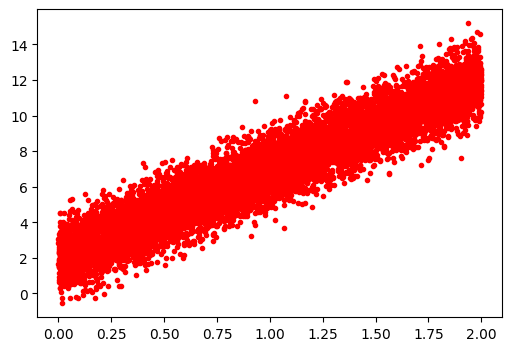

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "r.")

## Make the room for the b -- coefficent

In [8]:
X_dum = sk.preprocessing.add_dummy_feature(X)
X_dum

array([[1.        , 0.59249832],
       [1.        , 1.61813543],
       [1.        , 0.70050505],
       ...,
       [1.        , 0.79088034],
       [1.        , 0.57139035],
       [1.        , 1.14574562]])

## Calculate theta

In [9]:
theta = np.linalg.inv(X_dum.T @ X_dum) @ X_dum.T @ y
theta

array([[1.99961859],
       [4.98421526]])

## Let's Predict

In [10]:
X_new = np.array([[0], [2]])
X_new_b = sk.preprocessing.add_dummy_feature(X_new)
X_new

array([[0],
       [2]])

In [11]:
y_pred = X_new_b @ theta
y_pred

array([[ 1.99961859],
       [11.9680491 ]])

Text(0.75, 4, 'Predicted Line')

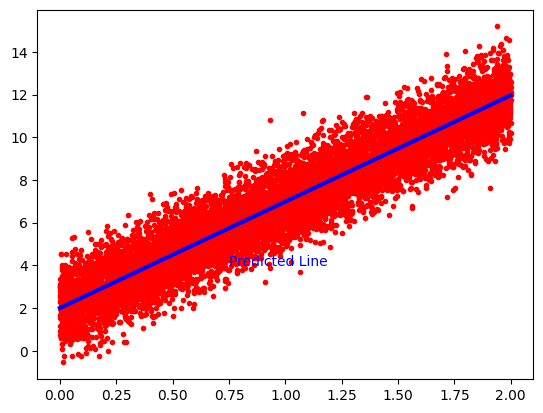

In [12]:
plt.plot(X, y, 'r.')
plt.plot(X_new, y_pred, 'b-', linewidth=3)

plt.text(0.75, 4, "Predicted Line", color='blue')

---

# Compare Result with sklearn

In [13]:
# sklearn 

lr = LinearRegression()

lr.fit(test_x, test_y)

print(lr.intercept_, lr.coef_)

pred_lr = lr.predict(test_x)

[2.01491095] [[4.97924095]]


In [14]:
print(f"SkLearn Linear Regression: {rmse(test_y, pred_lr)[0].round(2)}")

SkLearn Linear Regression: 0.97


In [15]:
# Multiple Linear Regeression using the normal Equation

mlr = MLinearRegression()

mlr.validate(train_x, train_y)

mlr.fit(train_x, train_y)

print(mlr.theta)

pred = mlr.predict(test_x)

Fitting model
Models ready to predict
[[1.99290282]
 [4.98648636]]


In [16]:
print(f"Normal Equation Linear Regression: {rmse(test_y, pred)[0].round(2)}")

Normal Equation Linear Regression: 0.97


In [17]:
# Full Batch gradient 

gd_full = GradientDesentLinearRegression()

gd_full.validate(train_x, train_y)

gd_full.fit(train_x, train_y)

pred_full = gd_full.predict(test_x)

gd_full.theta

Fitting model
Theta is constructed using the full batch


array([[1.99290282],
       [4.98648636]])

In [18]:
print(f"Gradient Descent Linear Regression(Full Batch): {rmse(test_y, pred_full)[0].round(2)}")

Gradient Descent Linear Regression(Full Batch): 0.97


In [19]:
# stochastic gradient

gd_sg = GradientDesentLinearRegression(method="stochastic")

gd_sg.validate(train_x, train_y)

gd_sg.fit(train_x, train_y)

pred_sg = gd_sg.predict(test_x)

gd_sg.theta

Fitting model
Theta is constructed using the stochastic method


array([[1.99376648],
       [4.98845935]])

In [20]:
print(f"Stochastic Gradient Descent Linear Regression: {rmse(test_y, pred_sg)[0].round(2)}")

Stochastic Gradient Descent Linear Regression: 0.97


In [21]:
# mini-batch learning

mini = GradientDesentLinearRegression(method="mini")

mini.validate(train_x, train_y)

mini.fit(train_x, train_y)

pred_mini = mini.predict(test_x)

mini.theta

Fitting model
Theta is constructed using the mini-batch method


array([[2.0140141 ],
       [5.01103211]])

In [22]:
print(f"Mini Batch Gradient Descent Linear Regression: {rmse(test_y, pred_mini)[0].round(2)}")

Mini Batch Gradient Descent Linear Regression: 0.97


# __Resources__

---
__Linear Regression__

1. [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
2. [Some guy on medium](https://www.researchgate.net/publication/327446287_Multiple_Linear_Regression_Model_for_Estimating_the_Price_of_a_Housing_Unit)

__Normal Equation__

3. [Paper](https://jastt.org/index.php/jasttpath/article/view/57/20)
4. [Paper](https://arxiv.org/pdf/2302.06464)
5. [ML-Wiki - normal equation](http://mlwiki.org/index.php/Normal_Equation)

__Bactch Gradient__

6. [Udacity](https://www.udacity.com/blog/2025/02/gradient-descent-optimization-a-simple-guide-for-beginners.html)
7. [ML-Wiki](http://mlwiki.org/index.php/Gradient_Descent)

__SGD__

8. [Medium](https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1)
9. [Machine Learning Mastery](https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/)  <--- good implementation

__GD__

10. [Medium](https://medium.com/towards-data-science/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

__Mini-Batch__

11. [Machine Lerning Mastery](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)


Will add more on the way if i find anything useful

# __Note__

If any one find error in this please do enlighten me on the issue. 


Open to any kind suggestions